# Runtime Correlations

In [396]:
import pandas as pd

In [397]:
#import relevant tables

movie_budgets = pd.read_csv("./data/tngross.csv")
movie_production = pd.read_csv("./data/tnproduction.csv")

In [398]:
movie_production

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States
...,...,...,...,...,...
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States


In [399]:
movie_budgets

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"
...,...,...,...,...,...,...
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0


In [400]:
#merge two tables together on index

df = movie_production.merge(movie_budgets, left_index=True, right_index=True)

In [401]:
#Clean up data by removing '$' and ',' from the production budget and worldwide gross and then convert columns to integers

df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(int)

In [402]:
#drop unnecessary columns

df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
df

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,181 minutes,Action,Marvel Studios,United States,"Apr 23, 2019",Avengers: Endgame,400000000,"$858,373,000",2797800564
1,136 minutes,Adventure,Walt Disney Pictures,United States,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,"$241,071,802",1045713802
2,141 minutes,Action,Marvel Studios,United States,"Apr 22, 2015",Avengers: Age of Ultron,365000000,"$459,005,868",1395316979
3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2064615817
4,156 minutes,Action,Marvel Studios,United States,"Apr 25, 2018",Avengers: Infinity War,300000000,"$678,815,482",2044540523
...,...,...,...,...,...,...,...,...,...
6095,90 minutes,Drama,None,United States,"Mar 17, 2015",Closure,100000,$0,0
6096,88 minutes,Adventure,Phebean Films,Nigeria,"Aug 29, 2015",Lunch Time Heroes,100000,$0,0
6097,None,Documentary,None,United States,"Mar 25, 2015",Open Secret,100000,$0,0
6098,None,Horror,None,United States,"Nov 10, 2015",The Night Visitor,100000,$0,0


In [403]:
#Exclude rows where there is no value given for runtime

df = df[(df['runtime_minutes'] != 'None')]

In [404]:
#Remove 'minutes' from runtime minutes category and convert to integer

df['runtime_minutes'] = df['runtime_minutes'].str.replace('minutes', '')
df['runtime_minutes'] = df['runtime_minutes'].astype(int)

<ipython-input-404-c3d36fb5435e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime_minutes'] = df['runtime_minutes'].str.replace('minutes', '')
<ipython-input-404-c3d36fb5435e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime_minutes'] = df['runtime_minutes'].astype(int)


In [405]:
#Check to make sure data types are accurate

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 6099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   runtime_minutes     4995 non-null   int64 
 1   genres              4995 non-null   object
 2   production_company  4995 non-null   object
 3   production_country  4995 non-null   object
 4   release_date        4995 non-null   object
 5   movie               4995 non-null   object
 6   production_budget   4995 non-null   int64 
 7   domestic_gross      4995 non-null   object
 8   worldwide_gross     4995 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 390.2+ KB


In [406]:
#Remove rows from worldwide gross that have a value of 0

df = df[(df['worldwide_gross'] != 0)]
df

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,181,Action,Marvel Studios,United States,"Apr 23, 2019",Avengers: Endgame,400000000,"$858,373,000",2797800564
1,136,Adventure,Walt Disney Pictures,United States,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,"$241,071,802",1045713802
2,141,Action,Marvel Studios,United States,"Apr 22, 2015",Avengers: Age of Ultron,365000000,"$459,005,868",1395316979
3,136,Adventure,"Lucasfilm, Bad Robot",United States,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2064615817
4,156,Action,Marvel Studios,United States,"Apr 25, 2018",Avengers: Infinity War,300000000,"$678,815,482",2044540523
...,...,...,...,...,...,...,...,...,...
6084,110,None,None,United States,"Sep 17, 1920",Over the Hill to the Poorhouse,100000,"$3,000,000",3000000
6086,93,Drama,"Sailor Bear, Zero Trans Fat Productions, Ideam...",United States,"Jul 7, 2017",A Ghost Story,100000,"$1,594,798",2769782
6088,90,Comedy,None,United States,"Feb 6, 2004",The Lost Skeleton of Cadavra,100000,"$110,536",110536
6089,85,Thriller/Suspense,Snowfort Pictures,United States,"Mar 21, 2014",Cheap Thrills,100000,"$59,424",59424


In [407]:
#Create a new column that divides worldwide gross by production budget in order to get a ratio for profit

df['profit'] =  df['worldwide_gross'] / df['production_budget']

In [408]:
#Sort data frame by profit in descending order

df = df.sort_values(by=['profit'], ascending=False)
df.head(5)

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
6013,93,Action,Roadshow Films,Australia,"Apr 12, 1979",Mad Max,200000,"$8,750,000",99750000,498.750000
5882,96,Horror,"Blumhouse, Solana Films",United States,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853
6080,81,Horror,"New Line Cinema, Blumhouse, Tremendum Pictures...",United States,"Jul 9, 2015",The Gallows,100000,"$22,764,410",41656474,416.564740
5794,81,Horror,None,United States,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333
5728,70,Adventure,Walt Disney Animation Studios,United States,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312


# Examining Runtime

In [409]:
#Exclude rows where there is no value given for runtime

runtime_df = df[(df['runtime_minutes'] != 'None')].copy()
runtime_df

,runtime_minutes,genres,production_company,production_country,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
6013,93,Action,Roadshow Films,Australia,"Apr 12, 1979",Mad Max,200000,"$8,750,000",99750000,498.750000
5882,96,Horror,"Blumhouse, Solana Films",United States,"Sep 25, 2009",Paranormal Activity,450000,"$107,918,810",194183034,431.517853
6080,81,Horror,"New Line Cinema, Blumhouse, Tremendum Pictures...",United States,"Jul 9, 2015",The Gallows,100000,"$22,764,410",41656474,416.564740
5794,81,Horror,None,United States,"Jul 14, 1999",The Blair Witch Project,600000,"$140,539,099",248300000,413.833333
5728,70,Adventure,Walt Disney Animation Studios,United States,"Aug 13, 1942",Bambi,858000,"$102,797,000",268000000,312.354312
...,...,...,...,...,...,...,...,...,...,...
4068,95,Action,"SC Films Thailand, Thor Pictures, BMP","Thailand, United States","May 8, 2015",Skin Trade,9000000,"$1,242",1242,0.000138
440,156,Musical,None,United States,"Nov 12, 2021",West Side Story,100000000,$0,11702,0.000117
4700,123,Action,None,"United Kingdom, United States","Dec 10, 1977",Capricorn One,5000000,$0,401,0.000080
5340,83,Black Comedy,"Aristar Entertainment, Sheridanscope",United States,"Mar 20, 2015",The Walking Deceased,2000000,$0,43,0.000022


In [410]:
runtime_df.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,4773.000000,4.773000e+03,4.773000e+03,4773.000000
mean,109.310706,3.754341e+07,1.149716e+08,4.829081
std,19.908741,4.506838e+07,1.976834e+08,17.413668
min,41.000000,1.000000e+05,1.700000e+01,0.000002
25%,95.000000,8.500000e+06,1.225475e+07,0.889254
50%,106.000000,2.100000e+07,4.440054e+07,2.159607
75%,120.000000,5.000000e+07,1.308710e+08,4.271830
max,260.000000,4.000000e+08,2.845900e+09,498.750000


Here we can see that the mean runtime for all the movies in our dataset is 109 minutes. Next, we'll check to see if there's a correlation between the runtime of movies and its profitability. 

In [411]:
#Calculate correlation of movie runtime and profitability

correlation = runtime_df['runtime_minutes'].corr(runtime_df['profit'])
correlation

-0.030769039757055326

This results tells us there's a negative cvorrelation between movie profitability and runtime (longer movies are less profitable and shorter movies are more pfotable), but it's a weak correlation. To dig in a bit further, let's divide the data into 2 dataframes: one with movies that made a profit and one with movies that didn't make a profit. That way we can compare the runtimes between those two groups to get a better sense of their similarity or difference.

In [412]:
#Create two new data frames, one that only includes profitable movies and one that only includes unprofitable movies

profitable = runtime_df[runtime_df['profit'] >= 1]
non_profitable = runtime_df[runtime_df['profit'] < 1]

In [413]:
profitable.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,3456.000000,3.456000e+03,3.456000e+03,3456.000000
mean,110.286169,4.173212e+07,1.532401e+08,6.506777
std,20.337115,4.927727e+07,2.201779e+08,20.213430
min,41.000000,1.000000e+05,1.105360e+05,1.000265
25%,96.000000,9.500000e+06,3.132758e+07,1.895467
50%,107.000000,2.500000e+07,7.700959e+07,3.120961
75%,121.000000,5.500000e+07,1.802631e+08,5.453992
max,248.000000,4.000000e+08,2.845900e+09,498.750000


In [414]:
non_profitable.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,1317.000000,1.317000e+03,1.317000e+03,1317.000000
mean,106.750949,2.655159e+07,1.454946e+07,0.426561
std,18.502450,2.869145e+07,2.219965e+07,0.319303
min,59.000000,1.000000e+05,1.700000e+01,0.000002
25%,94.000000,7.000000e+06,6.857800e+05,0.117508
50%,103.000000,1.800000e+07,6.200000e+06,0.390211
75%,116.000000,3.600000e+07,1.882158e+07,0.716541
max,260.000000,2.000000e+08,1.741313e+08,0.998889


In [415]:
#removing rows where worldwide gross = 0
non_profitable = non_profitable[(non_profitable['worldwide_gross'] != 0)]

In [416]:
#print mean runtimes of profitable and non-profitable movies
avg_runtime_profitable = profitable['runtime_minutes'].mean().round(2)
avg_runtime_non_profitable = non_profitable['runtime_minutes'].mean().round(2)

print(f'The mean runtime of profitable movies is {avg_runtime_profitable} minutes.')
print(f'The mean runtime of non-profitable movies is {avg_runtime_non_profitable} minutes.')

The mean runtime of profitable movies is 110.29 minutes.
The mean runtime of non-profitable movies is 106.75 minutes.


In [417]:
#print median runtimes of profitable and non-profitable
median_runtime_profitable = profitable['runtime_minutes'].median().round(2)
median_runtime_non_profitable = non_profitable['runtime_minutes'].median().round(2)

print(f'The median runtime of profitable movies is {median_runtime_profitable} minutes.')
print(f'The median runtime of non-profitable movies is {median_runtime_non_profitable} minutes.')

The median runtime of profitable movies is 107.0 minutes.
The median runtime of non-profitable movies is 103.0 minutes.


Here we see that the mean both profitable and non-profitable data sets are larger than their medians. This indicates their distriubutions are positivelty skewed. Next we'll look at the correlations between runtime and profitability for each data set.

In [418]:
#Calculate correlation of movie runtime and profitability for both the profitable and non-profitable data frames
correlation_profitable = profitable['runtime_minutes'].corr(profitable['profit'])
correlation_non_profitable = non_profitable['runtime_minutes'].corr(non_profitable['profit'])

print(f'The correlation of movie runtime and profitability for profitable movies is: {correlation_profitable}.')
print(f'The correlation of movie runtime and profitability for non-profitable movies is: {correlation_non_profitable}.')

The correlation of movie runtime and profitability for profitable movies is: -0.05098019410790402.
The correlation of movie runtime and profitability for non-profitable movies is: 0.12932930544517174.


Profitable movies have a weak negative correlation between runtime and profitablity while non-profitable movies have a slighlty larger positive correlation. Based on this, it's best to stick with shorter, as opposed to longer, running times for a greater chance at a successful movie.

In [419]:
import matplotlib.pyplot as plt
%matplotlib inline

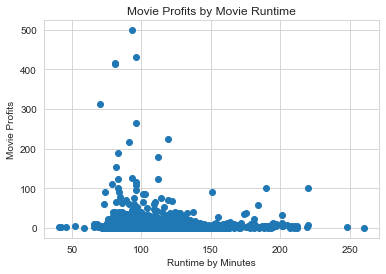

In [420]:
#Create a scatter plot of all movie runtimes based on profitability

fig, ax = plt.subplots()

ax.scatter(x = df['runtime_minutes'], y = df['profit'])
ax.set_title('Movie Profits by Movie Runtime')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Movie Profits');

This scatterplot doesn't tell us too much information, although there does appear to be more profitable movies in the shorter runtimes as opposed to longer runtimes. 

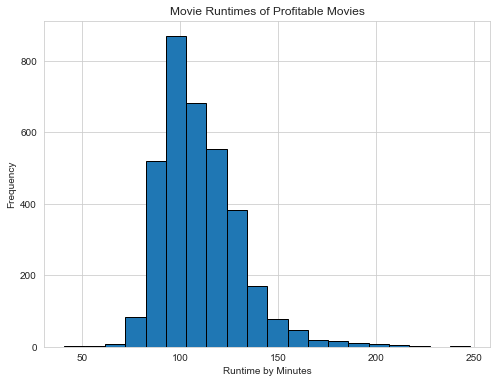

In [421]:

import numpy as np

fig, ax = plt.subplots(figsize = (8,6))

x=profitable['runtime_minutes']


ax.hist(x, edgecolor="black", bins=20)
ax.set_title('Movie Runtimes of Profitable Movies')
ax.set_xlabel('Runtime by Minutes')
ax.set_ylabel('Frequency');

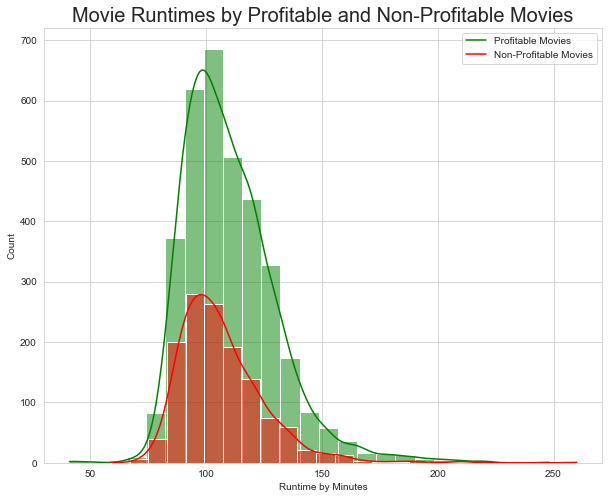

In [422]:
#Create a historgram with kde line of movie runtimes for both profitable movies and unprofitable movies

import seaborn as sns
fig, ax = plt.subplots(figsize = (10,8))
sns.set_style("whitegrid") 
sns.histplot(data=profitable, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes by Profitable and Non-Profitable Movies", size=20)

sns.histplot(data=non_profitable, x="runtime_minutes", color="red", alpha  = 0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"])

plt.savefig('movie_runtimes_profitable_and_non-Profitable Movies.png');

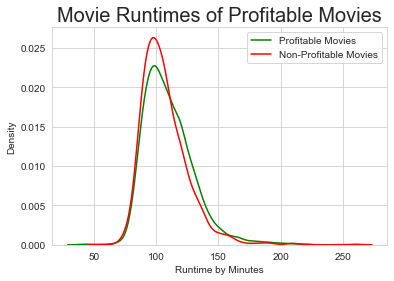

In [423]:
sns.set_style("whitegrid") 
sns.kdeplot(data=profitable, x="runtime_minutes", color="green")
sns.kdeplot(data=non_profitable, x="runtime_minutes", color="red")
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes of Profitable Movies", size=20)

plt.legend(labels=["Profitable Movies","Non-Profitable Movies"]);

In [447]:
#Create a new dataframe grouped by genre and arranged by descending profit amount

runtime_df = df.groupby('genres').apply(lambda x: x.sort_values(by ='profit', ascending = False))
runtime_df

runtime_minutes   genres  \
genres                                   
Action  6013               93   Action   
        5591              109   Action   
        5004              110   Action   
        5243              115   Action   
        3996              201   Action   
...                       ...      ...   
Western 1445              100  Western   
        2444               98  Western   
        4462              135  Western   
        3654              101  Western   
        4900              123  Western   

                                             production_company  \
genres                                                            
Action  6013                                     Roadshow Films   
        5591                                     United Artists   
        5004                    Eon Productions, United Artists   
        5243                    Eon Productions, United Artists   
        3996                             Aamir Khan Productions   
...                                                         ...   
Western 1445  Boram Entertainment, Wellmade Star M, Sidus FN...   
        2444  Boies/Schiller, 1821 Pictures, Handsomecharlie...   
        4462                                               None   
        3654  Bedford Falls, Black Bicycle, IM Global, Potbo...   
        4900                                               None   

                 production_country  release_date                  movie  \
genres                                                                     
Action  6013              Australia  Apr 12, 1979                Mad Max   
        5591         United Kingdom   May 8, 1963                 Dr. No   
        5004         United Kingdom  Dec 22, 1964             Goldfinger   
        5243         United Kingdom   Apr 8, 1964  From Russia With Love   
        3996                  India  Dec 21, 2016                 Dangal   
...                             ...           ...                    ...   
Western 1445            New Zealand   Dec 3, 2010      The Warrior's Way   
        2444          United States  Dec 31, 2015         Jane Got a Gun   
        4462          United States  Jun 18, 1969         The Wild Bunch   
        3654          United States  Jun 29, 2018      Woman Walks Ahead   
        4900  Mexico, United States   Apr 7, 1965           Major Dundee   

              production_budget domestic_gross  worldwide_gross      profit  
genres                                                                       
Action  6013             200000     $8,750,000         99750000  498.750000  
        5591            1000000    $16,067,035         59567035   59.567035  
        5004            3000000    $51,100,000        124900000   41.633333  
        5243            2000000    $24,800,000         78900000   39.450000  
        3996            9500000    $12,391,761        305149461   32.120996  
...                         ...            ...              ...         ...  
Western 1445           42000000     $5,666,340          8514325    0.202722  
        2444           25000000     $1,513,793          3771345    0.150854  
        4462            6000000       $509,424           509424    0.084904  
        3654           12000000        $57,528           627538    0.052295  
        4900            3800000        $14,873            14873    0.003914  

[4773 rows x 10 columns]

In [448]:
#Rename genre category to genre_cateogry to avoid confusion

runtime_df.rename({'genres': 'genre_category'}, axis=1, inplace=True)

In [449]:
#Get the number of movies for each genre

runtime_df.value_counts('genre_category')

genre_category
Drama                  1236
Comedy                  787
Action                  651
Adventure               634
Thriller/Suspense       507
Horror                  397
Romantic Comedy         205
Musical                  81
Black Comedy             81
Documentary              77
Western                  62
None                     40
Concert/Performance      13
Multiple Genres           2
dtype: int64

In [450]:
#Drop genres with less than 50 movies as well as rows that have worldwide gross of 0

runtime_df = runtime_df.loc[runtime_df['genre_category'] != 'Concert/Performance']
runtime_df = runtime_df.loc[runtime_df['genre_category'] != 'None']
runtime_df = runtime_df.loc[genre_df['genre_category'] != 'Multiple Genres']
runtime_df = runtime_df.loc[genre_df['worldwide_gross'] != 0]


In [454]:
#Find the median profits of each genre

runtime_df.groupby(['genre_category'])['profit'].median().sort_values(ascending = False)

genre_category
Horror               3.316691
Romantic Comedy      2.642526
Musical              2.624576
Adventure            2.623640
Action               2.218164
Comedy               2.101734
Black Comedy         1.769962
Thriller/Suspense    1.753237
Drama                1.730852
Western              1.439160
Documentary          1.330743
Name: profit, dtype: float64

In [453]:
#Find the mean profits of each genre

runtime_df.groupby(['genre_category'])['profit'].mean().sort_values(ascending = False)

genre_category
Horror               12.697377
Musical               8.248880
Documentary           6.583380
Western               4.874936
Adventure             4.298659
Drama                 4.223643
Romantic Comedy       4.140978
Action                3.926018
Comedy                3.724391
Thriller/Suspense     3.152935
Black Comedy          2.986744
Name: profit, dtype: float64

In [430]:
#Create a data frame with just horror movies

horror = runtime_df[(runtime_df['genre_category'] == 'Horror')]

In [435]:
#Find IQR for runtime for horror movies

horror.describe()

,runtime_minutes,production_budget,worldwide_gross,profit
count,397.000000,3.970000e+02,3.970000e+02,397.000000
mean,98.949622,1.761529e+07,7.208942e+07,12.697377
std,13.248689,1.970685e+07,8.828191e+07,42.709851
min,77.000000,1.000000e+05,5.000000e+03,0.000192
25%,90.000000,5.000000e+06,1.703343e+07,1.538395
50%,96.000000,1.100000e+07,4.217896e+07,3.316691
75%,104.000000,2.300000e+07,9.470423e+07,7.915460
max,171.000000,1.500000e+08,7.010830e+08,431.517853


In [456]:
#Create a new data frame of just the top 5 genres based on median profits and return number of movies in each genre

top_5_genres_by_medianprofit = runtime_df
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit[(top_5_genres_by_medianprofit['runtime_minutes'] != 'None')].copy()
top_5_genres_by_medianprofit['runtime_minutes'] = top_5_genres_by_medianprofit['runtime_minutes'].astype(int)
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Black Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Comedy']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Documentary']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Drama']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Thriller/Suspense']
top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[top_5_genres_by_medianprofit['genre_category'] != 'Western']
top_5_genres_by_medianprofit.value_counts('genre_category')



genre_category
Action             651
Adventure          634
Horror             397
Romantic Comedy    205
Musical             81
dtype: int64

In [457]:
top_5_genres_by_medianprofit.groupby(['genre_category'])['profit'].mean().sort_values(ascending = False)

genre_category
Horror             12.697377
Musical             8.248880
Adventure           4.298659
Romantic Comedy     4.140978
Action              3.926018
Name: profit, dtype: float64

In [458]:
#Drop genres with less than 50 movies as well as rows that have worldwide gross of 0

top_5_genres_by_medianprofit = top_5_genres_by_medianprofit.loc[(top_5_genres_by_medianprofit['genre_category'] != 'Concert/Performance') & 
                            (top_5_genres_by_medianprofit['genre_category'] != 'None') & 
                            (top_5_genres_by_medianprofit['genre_category'] != 'Multiple Genres')]

In [459]:
top_5_genres_by_medianprofit.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1968 entries, ('Action', 6013) to ('Romantic Comedy', 5473)
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   runtime_minutes     1968 non-null   int64  
 1   genre_category      1968 non-null   object 
 2   production_company  1968 non-null   object 
 3   production_country  1968 non-null   object 
 4   release_date        1968 non-null   object 
 5   movie               1968 non-null   object 
 6   production_budget   1968 non-null   int64  
 7   domestic_gross      1968 non-null   object 
 8   worldwide_gross     1968 non-null   int64  
 9   profit              1968 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 357.0+ KB


In [460]:
#Calculate the mean runtime minutes of movies by genre

top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].mean()


genre_category
Action             114.915515
Adventure          104.384858
Horror              98.949622
Musical            116.222222
Romantic Comedy    105.639024
Name: runtime_minutes, dtype: float64

In [461]:
#Calculate the median runtime minutes of movies by genre

for_graph = top_5_genres_by_medianprofit.groupby(['genre_category'])['runtime_minutes'].median().head(5)
for_graph

genre_category
Action             112
Adventure           99
Horror              96
Musical            113
Romantic Comedy    104
Name: runtime_minutes, dtype: int64

In [462]:
#Create x-axis variable for graph using genre categories

x = for_graph.index
x

Index(['Action', 'Adventure', 'Horror', 'Musical', 'Romantic Comedy'], dtype='object', name='genre_category')

In [463]:
#Create y-axis variable for graph using  median runtime minutes of movies by genre

y = for_graph.tolist()[0:5]
y

[112, 99, 96, 113, 104]

In [464]:
#Median runtime of all movies in top 5 profitable genres

top_5_genres_by_medianprofit['runtime_minutes'].median()

103.0

In [465]:
#Mean runtime of all movies in top 5 profitable genres

top_5_genres_by_medianprofit['runtime_minutes'].mean()

107.38973577235772

In [466]:
#Correlation of all runtime and profit in top 5 profitable genres

correlation_top_genres = top_5_genres_by_medianprofit['runtime_minutes'].corr(top_5_genres_by_medianprofit['profit'])
correlation_top_genres

-0.06541856717104048

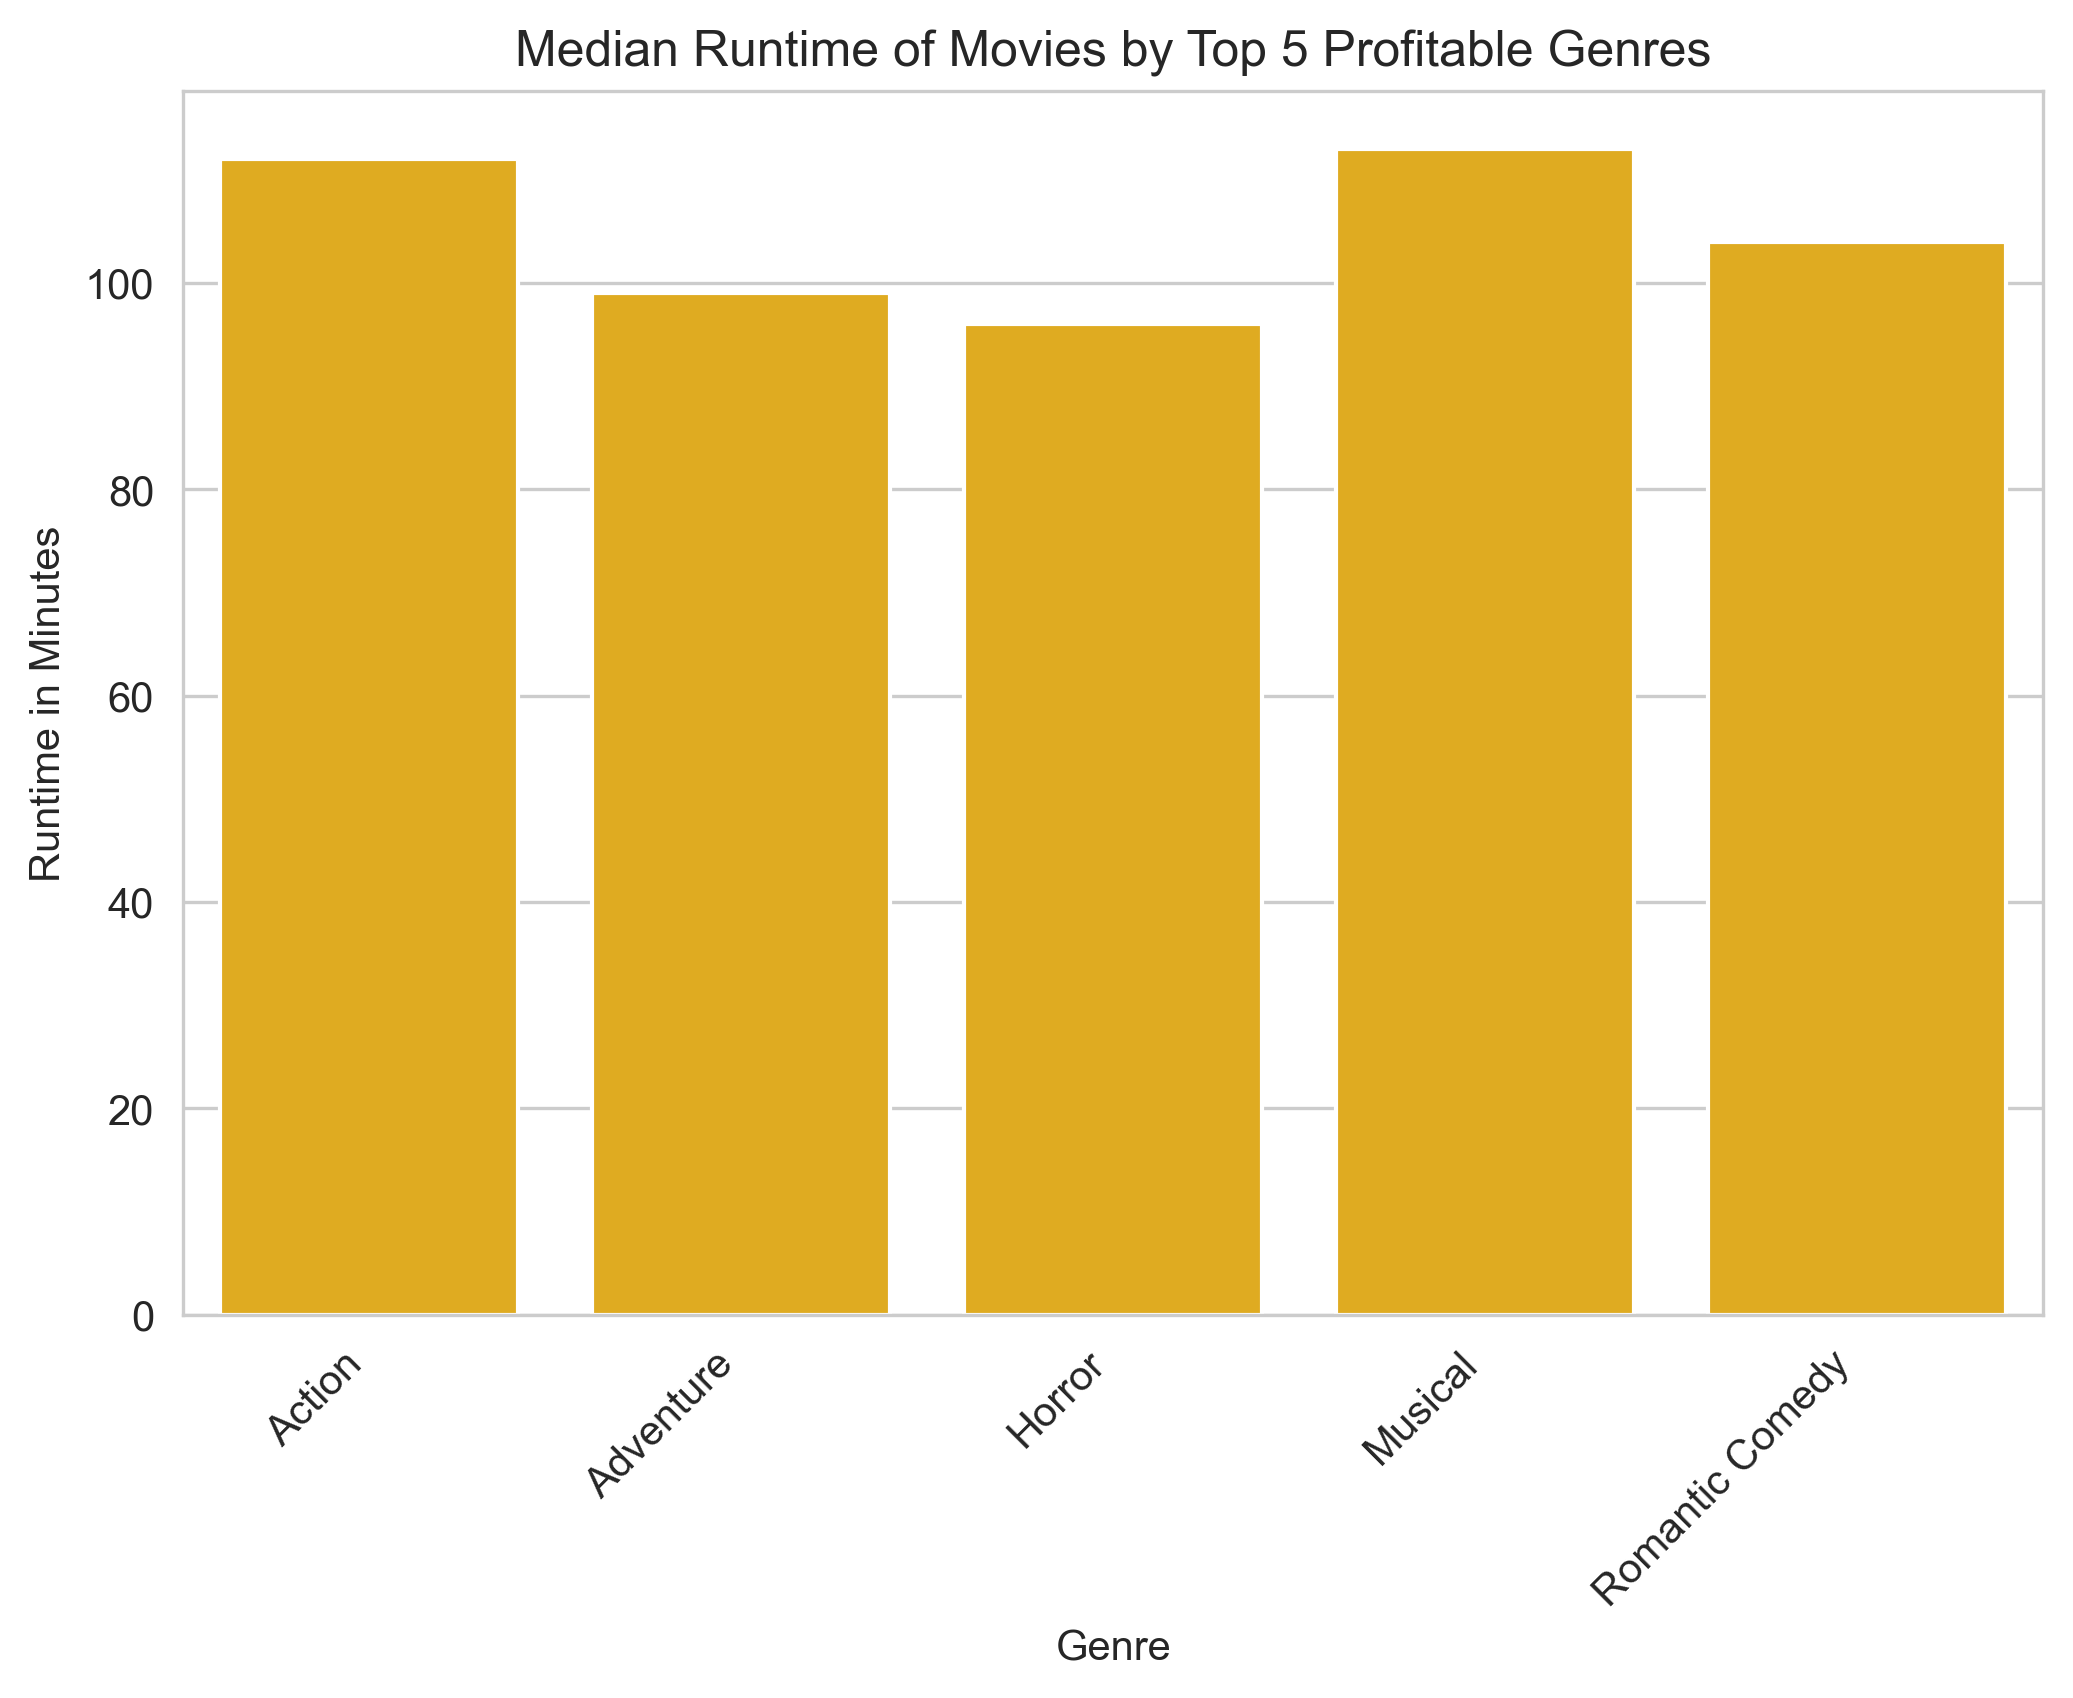

In [469]:
#Create bar graph showing median runtime of movies by genre, match other team members' graphs


fig, axes = plt.subplots(figsize=(8,6))

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
fig.autofmt_xdate(rotation=45)

sns.barplot(x=x, y=y, color='#FFBA01')
plt.xlabel("Genre")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime of Movies by Top 5 Profitable Genres")

plt.savefig('new_runtimes_by_genre.png', bbox_inches = 'tight');


